In [129]:
import pandas as pd
import numpy as np
import nltk

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import load_files 

from sklearn import preprocessing
from sklearn import metrics

from sklearn.datasets import fetch_20newsgroups
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from matplotlib.colors import ListedColormap
%matplotlib inline
#from wordcloud import WordCloud

from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
# sklearn imports
from sklearn import linear_model

# helper for logistic regression explanations
from scipy.special import expit
from scipy.special import logit

# visualization libraries 
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [9]:
df = pd.read_excel(r'AllTagsReady.xlsx', index_col=0)
df

,id,user name,text,time stamps,retweets
1,1408213280213147904,DivineSoul_,RT @GangWaveSquidda: My boy would've been 25 t...,2021-06-24 23:59:43,0
2,1408213265490924032,ElleStonewood,Had a great day at the zoo with my son Jack! H...,2021-06-24 23:59:40,1
3,1408213203859886080,edjlazar,RT @WillowAssist: Thanks @edjlazar for the Ret...,2021-06-24 23:59:25,0
4,1408213169860976896,Glams_Radio,#Now playing on @Glams_Radio : #Surrender (Ori...,2021-06-24 23:59:17,0
5,1408213108452101888,LeeHillerLondon,Forever Hearts Red on White Mug\n#romantic #mu...,2021-06-24 23:59:03,0
...,...,...,...,...,...
15105,1406823578176131072,rameshlaus,#India continues to report daily #Corona cases...,2021-06-21 03:57:33,17
15106,1407589145141075968,dna,Good news! #Pfizer gears up to supply 1 billio...,2021-06-23 06:39:38,20
15107,1407217032865660928,theage,Victoria’s police union has joined forced with...,2021-06-22 06:01:00,19
15108,1405549794240646912,jitupatwari,Respected @narendramodi Jee.\nForm a special t...,2021-06-17 15:35:59,20


In [10]:
df1=pd.DataFrame({"text":df['text'],"retweeted":df['retweets']>0})
df1

,text,retweeted
1,RT @GangWaveSquidda: My boy would've been 25 t...,False
2,Had a great day at the zoo with my son Jack! H...,True
3,RT @WillowAssist: Thanks @edjlazar for the Ret...,False
4,#Now playing on @Glams_Radio : #Surrender (Ori...,False
5,Forever Hearts Red on White Mug\n#romantic #mu...,False
...,...,...
15105,#India continues to report daily #Corona cases...,True
15106,Good news! #Pfizer gears up to supply 1 billio...,True
15107,Victoria’s police union has joined forced with...,True
15108,Respected @narendramodi Jee.\nForm a special t...,True


In [19]:
# look on sample data
l=np.where(df['retweets']==0)[0].tolist()

for i in l[:20]:
    print(df['text'].iloc[i])

RT @GangWaveSquidda: My boy would've been 25 today.. Damn time flies. But continue to watch over us lil cuz, we miss and love you. Tell Gra…
RT @WillowAssist: Thanks @edjlazar for the Retweet 💚 how about learning how to find a balance between giving and receiving love ♥ https://t…
#Now playing on @Glams_Radio : #Surrender (Original Mix) by #Echolalia! Tune in now and enjoy sound of #DeepHouse #Love #Music
Forever Hearts Red on White Mug
#romantic #mug #Mugs #hearts #gifts #anniversary #wedding #Valentine #Love… https://t.co/F1ClP9SUOl
Finishing up my look at the Shang-Chi wave with the Mr. Hyde BAF. Do you have him? If so, what do you think?… https://t.co/gBr7uZfYiz
RT @KariJoys: Every day is perfect for #Love #Joy &amp; #Gratitude! 

#JoyTrain #Peace #Kindness  #MentalHealth #Quote #Mindfulness #GoldenHear…
RT @jayemo2u: Positivity. God. Love. Happiness. I'll Always Go 100 💯💜 #MostAmazingForEternity #DIAGEMS #DUBBLE #GOD #LOVE
RT @nikahnama: ⁠"When you look at me, what do you see?"⁠
I

In [16]:
df1["id"]=df1.index
trainDf=df1[df1["id"]%5!=0]
testDf=df1[df1["id"]%5==0]

In [28]:
count_vect = CountVectorizer(stop_words="english",max_features=10000)
X_tweet_counts = count_vect.fit_transform(df['text'])
X_tweet_counts.shape

(12968, 10000)

In [29]:
X_tweet_normalized = preprocessing.normalize(X_tweet_counts, norm='l1')

In [30]:
clf = MultinomialNB().fit(X_tweet_normalized, df1['retweeted'])

In [32]:
clf = MultinomialNB().fit(X_tweet_normalized, df1['retweeted'])

In [33]:
text_clf_nb = Pipeline([
    ('vect', CountVectorizer(stop_words="english",max_features=10000)),
    ('norm', preprocessing.Normalizer(norm='l1')),
    ('clf', MultinomialNB()),
])

In [34]:
text_clf_nb.fit(df1['text'], df1['retweeted'])

Pipeline(steps=[('vect',
                 CountVectorizer(max_features=10000, stop_words='english')),
                ('norm', Normalizer(norm='l1')), ('clf', MultinomialNB())])

In [39]:
twenty_test = df1[:20]
docs_test = twenty_test['text']
predicted = text_clf_nb.predict(docs_test)
np.mean(predicted == twenty_test['retweeted'])

0.8

In [52]:
print(metrics.classification_report(twenty_test['retweeted'], predicted,
    target_names=['not retweeted','retweeted']))

               precision    recall  f1-score   support

not retweeted       0.80      1.00      0.89        16
    retweeted       0.00      0.00      0.00         4

     accuracy                           0.80        20
    macro avg       0.40      0.50      0.44        20
 weighted avg       0.64      0.80      0.71        20



In [49]:
text_clf_nb.predict(['retweet for price #retweet #win #price','hello'])

array([False, False])

In [55]:
lines = []
for line in df['text']:
    line = line.strip().lower()
    #line = line.decode('ascii', 'ignore')
    if len(line)==0:
        continue
    lines.append(line)
text = " ".join(lines)

In [56]:
vectorizer=CountVectorizer(stop_words="english")
freq_vec=vectorizer.fit_transform([text]).toarray() # the function requires as input an array of docs..
freqDist=dict(zip(vectorizer.get_feature_names(),freq_vec[0])) # create a dictionary from the first (and only) row
freqDist=dict(sorted(freqDist.items(), key=lambda item: item[1],reverse=True)) # ascending sort..
#freqDist

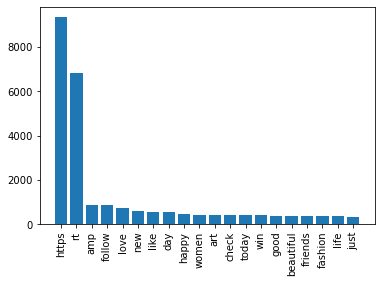

In [57]:
topK=20
plt.bar(list(freqDist.keys())[:topK], list(freqDist.values())[:topK])
plt.xticks(list(freqDist.keys())[:topK], rotation='vertical')
plt.show()

In [72]:
dfRetw = df.copy()
for ind in df.index:
    #print(ind)
    if (df['retweets'][ind]==0):
        dfRetw = dfRetw.drop([ind])
#dfRetw

In [73]:
dfRetw

,id,user name,text,time stamps,retweets
2,1408213265490924032,ElleStonewood,Had a great day at the zoo with my son Jack! H...,2021-06-24 23:59:40,1
18,1408212601885037056,megpfeiffer,"And ‘cause you like this one so much, “NEVER E...",2021-06-24 23:57:02,1
25,1408212248863162112,james_powell,Preaching or teaching based on FEAR is what is...,2021-06-24 23:55:38,1
28,1408212239077806080,jayemo2u,Positivity. God. Love. Happiness. I'll Always ...,2021-06-24 23:55:35,1
48,1408211616894684928,DawnellYJacobs,"So, I sat her down to eat, and she asked for h...",2021-06-24 23:53:07,1
...,...,...,...,...,...
15105,1406823578176131072,rameshlaus,#India continues to report daily #Corona cases...,2021-06-21 03:57:33,17
15106,1407589145141075968,dna,Good news! #Pfizer gears up to supply 1 billio...,2021-06-23 06:39:38,20
15107,1407217032865660928,theage,Victoria’s police union has joined forced with...,2021-06-22 06:01:00,19
15108,1405549794240646912,jitupatwari,Respected @narendramodi Jee.\nForm a special t...,2021-06-17 15:35:59,20


In [74]:
lines = []
for line in dfRetw['text']:
    line = line.strip().lower()
    #line = line.decode('ascii', 'ignore')
    if len(line)==0:
        continue
    lines.append(line)
text = " ".join(lines)

In [75]:
vectorizer=CountVectorizer(stop_words="english")
freq_vec=vectorizer.fit_transform([text]).toarray() # the function requires as input an array of docs..
freqDist=dict(zip(vectorizer.get_feature_names(),freq_vec[0])) # create a dictionary from the first (and only) row
freqDist=dict(sorted(freqDist.items(), key=lambda item: item[1],reverse=True)) # ascending sort..
#freqDist

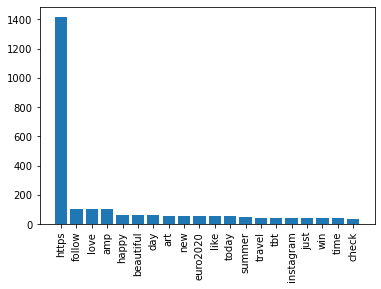

In [76]:
topK=20
plt.bar(list(freqDist.keys())[:topK], list(freqDist.values())[:topK])
plt.xticks(list(freqDist.keys())[:topK], rotation='vertical')
plt.show()

In [78]:
for ind in df.index:
    #print(ind)
    if (df['retweets'][ind]!=0):
        if(df['retweets'][ind]!=20):
            dfRetw = dfRetw.drop([ind])
dfRetw

,id,user name,text,time stamps,retweets
1263,1408207497404588032,RappCatsAdopt,Taylor's story: the farmer checked a groundhog...,2021-06-24 23:36:45,20
2465,1408168819168739072,BiswalAbhigyan,If ppl could read my mind they would go crazy....,2021-06-24 21:03:03,20
3482,1408197005323783936,Ranal55,"When you run with the pack, you are hunted wit...",2021-06-24 22:55:03,20
3847,1408211845463351040,todaysbird,Great egret.\n(Photo courtesy of @birdcrazed6)...,2021-06-24 23:54:01,20
7966,1408064949922897920,manukumarjain,Feeling loved to see this art made by our #MiF...,2021-06-24 14:10:19,20
...,...,...,...,...,...
15102,1406273911864454912,seethakkaMLA,Birthday gift to @RahulGandhi anna \n🔥Travelle...,2021-06-19 15:33:22,20
15104,1406875146976076032,seethakkaMLA,"Accept every desire that makes you strong, rej...",2021-06-21 07:22:28,20
15106,1407589145141075968,dna,Good news! #Pfizer gears up to supply 1 billio...,2021-06-23 06:39:38,20
15108,1405549794240646912,jitupatwari,Respected @narendramodi Jee.\nForm a special t...,2021-06-17 15:35:59,20


In [79]:
lines = []
for line in dfRetw['text']:
    line = line.strip().lower()
    #line = line.decode('ascii', 'ignore')
    if len(line)==0:
        continue
    lines.append(line)
text = " ".join(lines)

In [80]:
vectorizer=CountVectorizer(stop_words="english")
freq_vec=vectorizer.fit_transform([text]).toarray() # the function requires as input an array of docs..
freqDist=dict(zip(vectorizer.get_feature_names(),freq_vec[0])) # create a dictionary from the first (and only) row
freqDist=dict(sorted(freqDist.items(), key=lambda item: item[1],reverse=True)) # ascending sort..
#freqDist

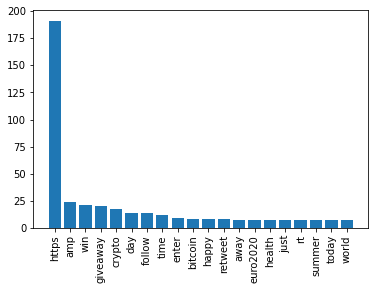

In [81]:
topK=20
plt.bar(list(freqDist.keys())[:topK], list(freqDist.values())[:topK])
plt.xticks(list(freqDist.keys())[:topK], rotation='vertical')
plt.show()

In [82]:
wordList1 = ['giveaway','crypto','enter','bitcoin','retweet','health','world','travel','tbt']
wordlist0 = ['women','check','good','friends','fashion','life']

In [93]:
wordMatDf = pd.DataFrame({})
for ind in df.index:
    temp = pd.DataFrame({
        'id':[df['id'][ind]],
        'giveaway':[df['text'][ind].strip().lower().count('giveaway')],
        'crypto':[df['text'][ind].strip().lower().count('crypto')],
        'enter':[df['text'][ind].strip().lower().count('enter')],
        'bitcoin':[df['text'][ind].strip().lower().count('bitcoin')],
        'retweet':[df['text'][ind].strip().lower().count('retweet')],
        'health':[df['text'][ind].strip().lower().count('health')],
        'world':[df['text'][ind].strip().lower().count('world')],
        'travel':[df['text'][ind].strip().lower().count('travel')],
        'tbt':[df['text'][ind].strip().lower().count('tbt')],
        'women':[df['text'][ind].strip().lower().count('women')],
        'check':[df['text'][ind].strip().lower().count('check')],
        'good':[df['text'][ind].strip().lower().count('good')],
        'friends':[df['text'][ind].strip().lower().count('friends')],
        'fashion':[df['text'][ind].strip().lower().count('fashion')],
        'life':[df['text'][ind].strip().lower().count('life')],
    })
    frames = [wordMatDf,temp]
    wordMatDf = pd.concat(frames, ignore_index=True)

wordMatDf

,id,giveaway,crypto,enter,bitcoin,retweet,health,world,travel,tbt,women,check,good,friends,fashion,life
0,1408213280213147904,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1408213265490924032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1408213203859886080,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1408213169860976896,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1408213108452101888,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12963,1406823578176131072,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12964,1407589145141075968,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
12965,1407217032865660928,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12966,1405549794240646912,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [94]:
wordMatDf.describe()

,id,giveaway,crypto,enter,bitcoin,retweet,health,world,travel,tbt,women,check,good,friends,fashion,life
count,1.296800e+04,12968.000000,12968.000000,12968.000000,12968.000000,12968.000000,12968.000000,12968.000000,12968.000000,12968.000000,12968.000000,12968.000000,12968.000000,12968.000000,12968.000000,12968.000000
mean,1.408038e+18,0.033544,0.046422,0.019124,0.006555,0.017273,0.052283,0.026604,0.040561,0.018276,0.073026,0.034007,0.054827,0.030074,0.039096,0.054287
std,3.999234e+14,0.202629,0.286459,0.140852,0.087131,0.141637,0.299424,0.165652,0.297630,0.135668,0.341003,0.182948,0.236621,0.185515,0.229198,0.259586
min,1.405532e+18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.408083e+18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.408187e+18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.408206e+18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.408213e+18,4.000000,6.000000,2.000000,4.000000,4.000000,4.000000,2.000000,6.000000,2.000000,4.000000,2.000000,4.000000,4.000000,5.000000,5.000000


In [178]:
X = wordMatDf.copy().values
y = df1['retweeted'].values
XTrain, XTest, yTrain, yTest = train_test_split(X, y, random_state=1, test_size=0.25)

In [179]:
# Instantiate the classifier
gnb = GaussianNB()


# Train classifier
gnb.fit(XTrain,yTrain)

y_pred = gnb.predict(XTest)
y_pred_train = gnb.predict(XTrain)

# Print results
print('Accuracy on Train data= ', metrics.accuracy_score(y_true = yTrain, y_pred = y_pred_train))
print('Accuracy on test data= ', metrics.accuracy_score(y_true = yTest, y_pred = y_pred))

Accuracy on Train data=  0.8954349167180753
Accuracy on test data=  0.8985194324491055


In [180]:
# get the class probabilities
gnb.class_prior_

array([0.89851943, 0.10148057])

In [182]:
gnb.theta_

array([[1.40808895e+18, 3.63886028e-02, 4.68016936e-02, 1.91097380e-02,
        6.52248541e-03, 1.61345692e-02, 5.73292139e-02, 2.62043712e-02,
        4.14235038e-02, 1.60201396e-02, 7.96429797e-02, 3.38711523e-02,
        5.72147843e-02, 3.06671244e-02, 4.11946447e-02, 5.57271999e-02],
       [1.40759493e+18, 2.12765957e-02, 4.35663627e-02, 2.02634245e-02,
        1.31712259e-02, 2.53292806e-02, 2.73556231e-02, 2.33029382e-02,
        3.85005066e-02, 3.44478217e-02, 1.41843972e-02, 3.14083080e-02,
        3.64741641e-02, 2.53292806e-02, 2.33029382e-02, 5.57244174e-02]])

In [183]:
gnb.sigma_

array([[6.55689669e+28, 1.57990644e+20, 1.57990644e+20, 1.57990644e+20,
        1.57990644e+20, 1.57990644e+20, 1.57990644e+20, 1.57990644e+20,
        1.57990644e+20, 1.57990644e+20, 1.57990644e+20, 1.57990644e+20,
        1.57990644e+20, 1.57990644e+20, 1.57990644e+20, 1.57990644e+20],
       [7.57009693e+29, 1.57990644e+20, 1.57990644e+20, 1.57990644e+20,
        1.57990644e+20, 1.57990644e+20, 1.57990644e+20, 1.57990644e+20,
        1.57990644e+20, 1.57990644e+20, 1.57990644e+20, 1.57990644e+20,
        1.57990644e+20, 1.57990644e+20, 1.57990644e+20, 1.57990644e+20]])

In [130]:
y = df1['retweeted'].values

In [162]:
word = 'giveaway'
retw = 'retweeted'


In [165]:
lrm=linear_model.LogisticRegression()
lrm.fit(wordMatDf[['giveaway']],wordMatDf[['crypto']],df1['retweeted'])

C:\Users\mor\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [173]:
giveaway=2
expit(lrm.intercept_[0]+lrm.coef_[0][0]*hours)

0.9999683489647875

In [174]:
y_pred = lrm.predict(wordMatDf[["giveaway"]])
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [175]:
y_actual=df1["retweeted"]
y_actual

1        False
2         True
3        False
4        False
5        False
         ...  
15105     True
15106     True
15107     True
15108     True
15109     True
Name: retweeted, Length: 12968, dtype: bool

In [176]:
metrics.confusion_matrix(y_actual, y_pred)

array([[11653,     0],
       [ 1315,     0]], dtype=int64)

In [177]:
print("accuracy is:",metrics.accuracy_score(y_actual, y_pred))
print("precision is:",metrics.precision_score(y_actual, y_pred))
print("recall is:",metrics.recall_score(y_actual, y_pred))
print("f1 is:",metrics.f1_score(y_actual, y_pred))

accuracy is: 0.8985965453423812
precision is: 0.0
recall is: 0.0
f1 is: 0.0


C:\Users\mor\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [134]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Initial amount of samples: #{}".format(X.shape[0]))
print("Number of training samples: #{}".format(X_train.shape[0]))
print("Number of test samples: #{}".format(X_test.shape[0]))

print("\nTarget distribution in original dataset:\n{}".format(y))
print("\nTarget distribution in the training set:\n{}\n".format(y_train))
print("Target distribution in the test set:\n{}".format(y_test))

Initial amount of samples: #12968
Number of training samples: #10374
Number of test samples: #2594

Target distribution in original dataset:
[False  True False ...  True  True  True]

Target distribution in the training set:
[False False False ... False False False]

Target distribution in the test set:
[False  True False ... False False False]


In [124]:
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [125]:
print("Mean: ", X_train_scaled.mean(axis=0))
print("Standard Deviation: ", X_train_scaled.std(axis=0))

Mean:  [-2.67874052e-10 -3.60613794e-16 -1.67250486e-16  5.35981730e-16
 -2.89191480e-16 -3.26568132e-16 -3.70529176e-16 -4.08151973e-16
 -6.16524803e-16  5.87452885e-16  1.06479314e-16  3.61384337e-16
  3.98916168e-16 -3.43565546e-16  7.74057895e-16  6.90518268e-16]
Standard Deviation:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [126]:
X_test_scaled = scaler.transform(X_test)
print("Mean: ", X_test_scaled.mean(axis=0))
print("Standard Deviation: ", X_test_scaled.std(axis=0))

Mean:  [ 1.94617820e-02 -2.43509274e-03 -1.57114332e-02  1.86495414e-02
 -2.12466604e-02 -2.23899835e-02  2.04021361e-02 -3.09581527e-05
 -8.27831962e-03 -1.19637928e-02 -6.12602009e-04 -5.61217519e-04
 -2.47614132e-03  4.84797393e-02  1.65045988e-02 -3.34573697e-03]
Standard Deviation:  [0.96632171 1.0505458  0.95696472 1.05292408 0.77783062 0.82006688
 1.11467974 0.9999061  0.89631079 0.94086403 1.04872429 0.98702821
 0.97458186 1.17473227 1.16422725 0.94519247]


In [127]:
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled_in_range = min_max_scaler.fit_transform(X_train)
print("Min Value: ", X_train_scaled_in_range.min(axis=0))
print("Max Value: ", X_train_scaled_in_range.max(axis=0))
X_test_scaled_in_range = min_max_scaler.transform(X_test)

Min Value:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Max Value:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [128]:

clf_model = LogisticRegression().fit(X_train, y_train)

C:\Users\mor\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
